# LOEW - Schramm-Loewner Evolutions in Python

`loew` is a package for simulation of Schramm-Loewner Evolutions (SLE).

[SLE](https://en.wikipedia.org/wiki/Schramm%E2%80%93Loewner_evolution) is a
nifty mathematical tool to analyze families of random fractals related to
[critical phenomena](https://en.wikipedia.org/wiki/Critical_phenomena).
In the last few years some work in the area has moved to numerics, so I hope
this package will be of some help to those involved. But even if yours is a
pure mathematics no-computers-allowed type of work, maybe you can use it to make some
sweet figures for your paper.

You can start right away by importing it the traditional way

In [1]:
%pylab inline --no-import-all
import numpy as np
import loew
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


Simulating chordal (i.e. upper half-plane contained)
Loewner evolutions is as simple as defining a drive and calling
a function

In [4]:
# define driving function U(t)
t = np.linspace(0.0, 10.0, 1000)
U = 3*np.sin(t*np.pi)

# compute a trace in the upper half-plane
zchr = loew.chordal.trace(t, U)  # returns a complex ndarray

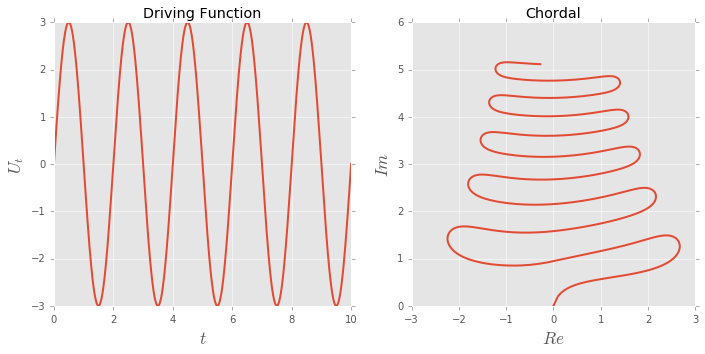

In [3]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

axs[0].set_title('Driving Function')
axs[0].plot(t, U, lw=2)

axs[1].set_title('Chordal')
axs[1].plot(zchr.real, zchr.imag, lw=2)

axs[0].set_xlabel('$t$', fontsize='xx-large')
axs[0].set_ylabel('$U_t$', fontsize='xx-large')
axs[1].set_aspect('equal')
axs[1].set_xlabel('$Re$', fontsize='xx-large')
axs[1].set_ylabel('$Im$', fontsize='xx-large')
fig.tight_layout()

The package also contains routines for simulating radial and dipolar SLE.
The radial function is 

In [5]:
# simulate Loewner traces inside de unit disk
zrad = loew.radial.trace(t, U)

# simulate Loewner traces inside the infinite strip of width=pi
zdip = loew.dipolar.trace(t, U, width=1.0)

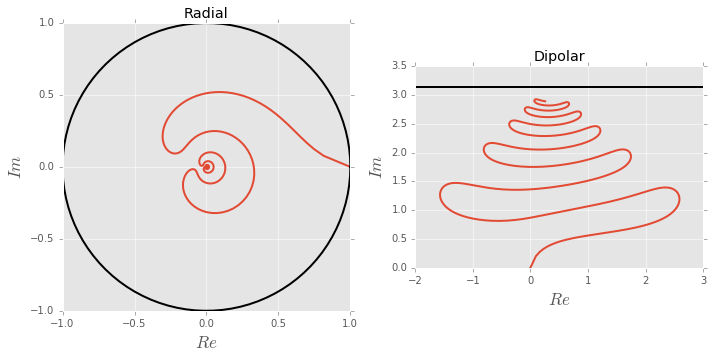

In [6]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

axs[0].set_title('Radial')
axs[0].plot(zrad.real, zrad.imag, lw=2)

axs[1].set_title('Dipolar')
axs[1].plot(zdip.real, zdip.imag, lw=2)

for ax in axs:
    ax.set_aspect('equal')
    ax.set_xlabel('$Re$', fontsize='xx-large')
    ax.set_ylabel('$Im$', fontsize='xx-large')
a = np.linspace(0.0, 2*np.pi, 100)
axs[0].plot(np.cos(a), np.sin(a), 'k-', lw=2)
axs[1].hlines(np.pi, *ax.get_xlim(), lw=2)
    
fig.tight_layout()

The algorithm used is the [zipper algorithm](http://arxiv.org/abs/0909.2438), which is $O(N^2)$, so keep that in mind when trying to simulate traces with too many points.

Of course the "Schramm" part Schramm-Loewner Evolution happen when we use a Brownian motion
as a drive. We also provide some functions to help you with that.

In [8]:
np.random.seed(312)
B = loew.misc.brownian_motion(t, kappa=2)
sle = loew.chordal.trace(t, B)

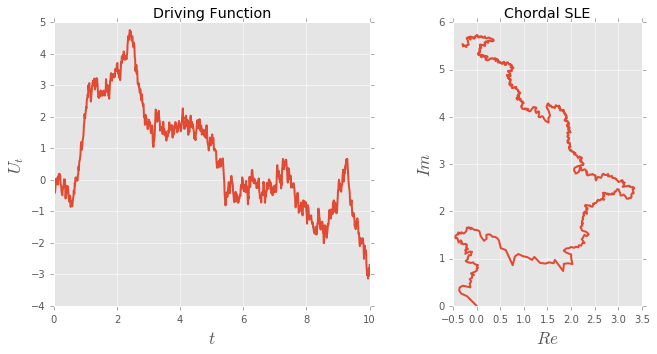

In [12]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

axs[0].set_title('Driving Function')
axs[0].plot(t, B, lw=2)

axs[1].set_title('Chordal SLE')
axs[1].plot(sle.real, sle.imag, lw=2)

axs[0].set_xlabel('$t$', fontsize='xx-large')
axs[0].set_ylabel('$U_t$', fontsize='xx-large')
axs[1].set_aspect('equal')
axs[1].set_xlabel('$Re$', fontsize='xx-large')
axs[1].set_ylabel('$Im$', fontsize='xx-large')
fig.tight_layout()

And if conformal invariance is too boring for you, we also added a fractional Brownian motion
routine, just for [fun](http://arxiv.org/abs/1507.05074).

In [15]:
np.random.seed(123)
t, fBm = loew.misc.fractional_brownian_motion(10000, h=0.75, b=20.0, tf=1.0)
asle = loew.chordal.trace(t, fBm)

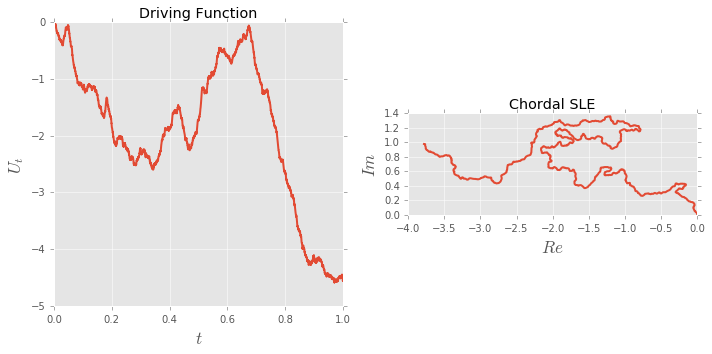

In [17]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

axs[0].set_title('Driving Function')
axs[0].plot(t, fBm, lw=2)

axs[1].set_title('Chordal SLE')
axs[1].plot(asle.real, asle.imag, lw=2)

axs[0].set_xlabel('$t$', fontsize='xx-large')
axs[0].set_ylabel('$U_t$', fontsize='xx-large')
axs[1].set_aspect('equal')
axs[1].set_xlabel('$Re$', fontsize='xx-large')
axs[1].set_ylabel('$Im$', fontsize='xx-large')
fig.tight_layout()

We also added the possibility of doing the inverse operation, computing the driving function out of a trace.
Currently it is only implemented for the chordal case.

In [3]:
im = np.linspace(0.0, np.pi, 1000)
re = np.sin(5*im)
z = re + 1j * im
t, u = loew.chordal.drive(z)

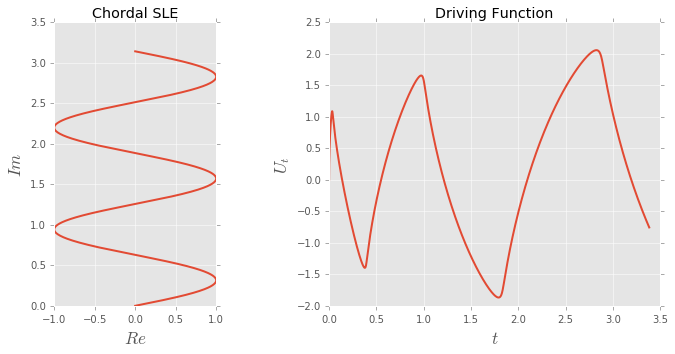

In [4]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

axs[0].set_title('Chordal SLE')
axs[0].plot(z.real, z.imag, lw=2)

axs[1].set_title('Driving Function')
axs[1].plot(t, u, lw=2)

axs[0].set_aspect('equal')
axs[0].set_xlabel('$Re$', fontsize='xx-large')
axs[0].set_ylabel('$Im$', fontsize='xx-large')
axs[1].set_xlabel('$t$', fontsize='xx-large')
axs[1].set_ylabel('$U_t$', fontsize='xx-large')

fig.tight_layout()